In [1]:
import pickle
import matplotlib.pyplot as plt
import math
import numpy

plt.rcParams.update({"text.usetex": True,"font.family": "serif"})
#plt.rcParams['text.latex.preamble'] = [
    #r'\usepackage{amsmath}',
    #r'\usepackage{amssymb}']
plt.rc('text.latex', preamble=r'\usepackage{amsmath}' r'\usepackage{amssymb}')

from matplotlib.lines import Line2D

In [5]:
#jobType = "varyingConstantsCurvature"
jobType = "EDE"
#jobType = "H0"
#jobType = "SIDR"

if jobType == "varyingConstantsCurvature":
    jobNameA = 'spectra_varyingConstantsCurvature_A' # 
    jobNameB = 'spectra_varyingConstantsCurvature_B' # varying m_e +0.002
    jobNameC = 'spectra_varyingConstantsCurvature_C' # varying alpha +0.002
    jobNameD = 'spectra_varyingConstantsCurvature_D' # Omega k +0.01
    output = './outputs/spectra/varyingConstantsCurvature/'
    
    with open('./CLASS_delens/results/' + jobNameA + ".pkl", 'rb') as f:
        dataA = pickle.load(f, encoding="latin1")
    with open('./CLASS_delens/results/' + jobNameB + ".pkl", 'rb') as f:
        dataB = pickle.load(f, encoding="latin1")
    with open('./CLASS_delens/results/' + jobNameC + ".pkl", 'rb') as f:
        dataC = pickle.load(f, encoding="latin1")
    with open('./CLASS_delens/results/' + jobNameD + ".pkl", 'rb') as f:
        dataD = pickle.load(f, encoding="latin1")
    powersA = dataA['powersFid'][0]
    powersB = dataB['powersFid'][1]
    powersC = dataC['powersFid'][2]
    powersD = dataD['powersFid'][3]

if jobType == "EDE":
    jobNameA = 'spectra_EDE_A' # 
    jobNameB = 'spectra_EDE_B' # fEDE +0.008
    jobNameC = 'spectra_EDE_C' # log10z_c +0.04
    jobNameD = 'spectra_EDE_D' # thetai_scf +0.05
    output = './outputs/spectra/EDE/'

    with open('./CLASS_delens/results/' + jobNameA + ".pkl", 'rb') as f:
        dataA = pickle.load(f, encoding="latin1")
    with open('./CLASS_delens/results/' + jobNameB + ".pkl", 'rb') as f:
        dataB = pickle.load(f, encoding="latin1")
    with open('./CLASS_delens/results/' + jobNameC + ".pkl", 'rb') as f:
        dataC = pickle.load(f, encoding="latin1")
    with open('./CLASS_delens/results/' + jobNameD + ".pkl", 'rb') as f:
        dataD = pickle.load(f, encoding="latin1")
    powersA = dataA['powersFid'][0]
    powersB = dataB['powersFid'][1]
    powersC = dataC['powersFid'][2]
    powersD = dataD['powersFid'][3]
    
if jobType == "SIDR":
    jobNameA = 'spectra_EDE_A' # LCDM
    jobNameB = 'spectra_EDE_B' # N_idr +0.080
    jobNameC = 'spectra_EDE_C' # Gamma_0_nadm +0.37e-8
    output = './outputs/spectra/SIDR/'
    
    with open('./CLASS_delens/results/' + jobNameA + ".pkl", 'rb') as f:
        dataA = pickle.load(f, encoding="latin1")
    with open('./CLASS_delens/results/' + jobNameB + ".pkl", 'rb') as f:
        dataB = pickle.load(f, encoding="latin1")
    with open('./CLASS_delens/results/' + jobNameC + ".pkl", 'rb') as f:
        dataC = pickle.load(f, encoding="latin1")
    powersA = dataA['powersFid'][0]
    powersB = dataB['powersFid'][1]
    powersC = dataC['powersFid'][2]

    
if jobType == "H0":
    jobNameA = 'spectra_H0_A' # 
    jobNameB = 'spectra_H0_B' # H0 +1.2
    output = './outputs/spectra/H0/'
    
    with open('./CLASS_delens/results/' + jobNameA + ".pkl", 'rb') as f:
        dataA = pickle.load(f, encoding="latin1")
    with open('./CLASS_delens/results/' + jobNameB + ".pkl", 'rb') as f:
        dataB = pickle.load(f, encoding="latin1")
    powersA = dataA['powersFid'][0]
    powersB = dataB['powersFid'][1]
    
ells = powersB['unlensed']['l']
lmaxToPlot = 5000
lminToPlot = 0

In [6]:
polCombsToPlot = ['dl_TT','dl_TE','dl_EE','cl_kk']
polCombsPretty = [r'$\partial \mathcal{D}_{\ell}^{TT}$ [$\mu\mathrm{K}^2$]',r'$\partial \mathcal{D}_{\ell}^{TE}$ [$\mu\mathrm{K}^2$]', \
                  r'$\partial \mathcal{D}_{\ell}^{EE}$ [$\mu\mathrm{K}^2$]',r'$\partial C_{\ell}^{\kappa\kappa}$ [$\mu\mathrm{K}^2$]']

if jobType == "varyingConstantsCurvature":
    nPlots = 2
    colors = ['darkred', 'darkgreen', 'darkblue', 'salmon', 'lightgreen', 'lightblue']
    widths = [2]
    linestyles = ['solid','dashed']
if jobType == "EDE":
    nPlots = 2
    colors = ['darkred', 'darkgreen', 'darkblue', 'salmon', 'lightgreen', 'lightblue']
    widths = [2]
    linestyles = ['solid','dashed']
if jobType == "H0":
    nPlots = 2
    colors = ['black','gray']
    widths = [2]
    linestyles = ['solid','dashed']
if jobType == "SIDR":
    nPlots = 2
    colors = ['darkred', 'darkgreen', 'black', 'salmon', 'lightgreen', 'black']
    widths = [2]
    linestyles = ['solid','dashed']

<Figure size 640x480 with 0 Axes>

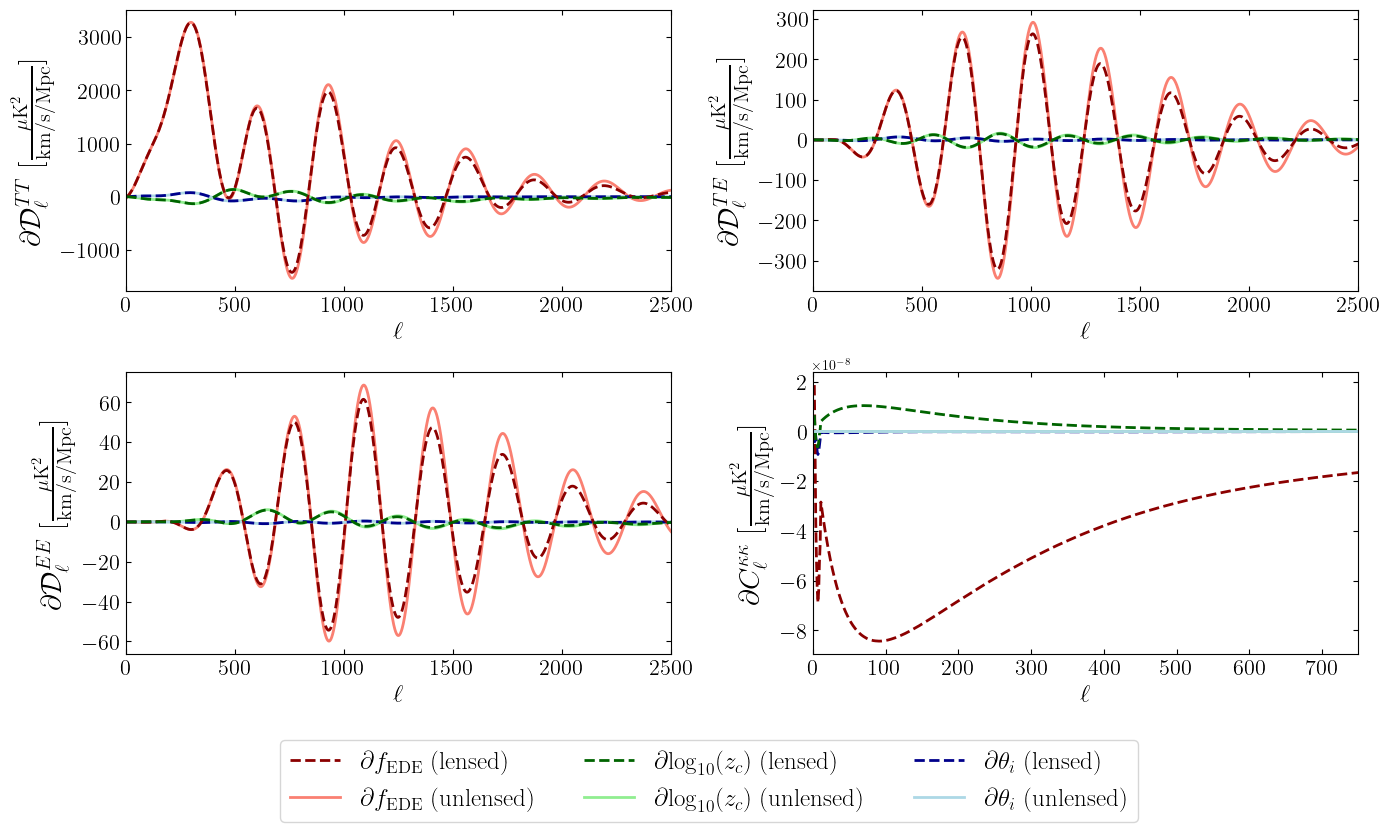

In [7]:
plt.clf()
fig = plt.figure(figsize=(14,14))

lminToPlot = 0

if jobType == "varyingConstantsCurvature":
    for pc, polComb in enumerate(polCombsToPlot):
            i = pc+1
            ax = plt.subplot(nPlots*2, nPlots, i)
            ax.tick_params(direction="in",top=True,right=True)
            ax.get_yaxis().set_tick_params(which='minor', direction='in',right=True) 
            ax.margins(0.0,0.05)
            if polComb == 'cl_phiphi' or polComb == 'cl_dd' or polComb == 'cl_kk':
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersD['lensing'][polComb][lminToPlot:lmaxToPlot] - powersA['lensing'][polComb][lminToPlot:lmaxToPlot])/0.01, label='lensed omk', \
                        color = colors[2], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['lensing'][polComb][lminToPlot:lmaxToPlot] - powersA['lensing'][polComb][lminToPlot:lmaxToPlot])/0.002, label='lensed me', \
                        color = colors[0], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersC['lensing'][polComb][lminToPlot:lmaxToPlot] - powersA['lensing'][polComb][lminToPlot:lmaxToPlot])/0.002, label='lensed alpha', \
                        color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],[0]*(lmaxToPlot-lminToPlot), label='unlensed me', \
                        color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],[0]*(lmaxToPlot-lminToPlot), label='unlensed alpha', \
                        color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],[0]*(lmaxToPlot-lminToPlot), label='unlensed omk', \
                        color = colors[5], linewidth = widths[0], linestyle = linestyles[0])
                plt.xlim([0, 750])
            else:
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['unlensed'][polComb][lminToPlot:lmaxToPlot] - powersA['unlensed'][polComb][lminToPlot:lmaxToPlot])/0.002, label='unlensed me', \
                        color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersC['unlensed'][polComb][lminToPlot:lmaxToPlot] - powersA['unlensed'][polComb][lminToPlot:lmaxToPlot])/0.002, label='unlensed alpha', \
                        color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersD['unlensed'][polComb][lminToPlot:lmaxToPlot] - powersA['unlensed'][polComb][lminToPlot:lmaxToPlot])/0.01, label='unlensed omk', \
                        color = colors[5], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersD['lensed'][polComb][lminToPlot:lmaxToPlot] - powersA['lensed'][polComb][lminToPlot:lmaxToPlot])/0.01, label='lensed omk', \
                        color = colors[2], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['lensed'][polComb][lminToPlot:lmaxToPlot] - powersA['lensed'][polComb][lminToPlot:lmaxToPlot])/0.002, label='lensed me', \
                        color = colors[0], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersC['lensed'][polComb][lminToPlot:lmaxToPlot] - powersA['lensed'][polComb][lminToPlot:lmaxToPlot])/0.002, label='lensed alpha', \
                        color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                plt.xlim([0, 2500])
            plt.xlabel('$\ell$',fontsize=18)
            plt.ylabel(polCombsPretty[pc],fontsize=21)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

    labels = [r'$\partial \delta m_e$ (lensed)', \
              r'$\partial \delta m_e$ (unlensed)', \
              r'$\partial \delta \alpha$ (lensed)', \
              r'$\partial \delta \alpha$ (unlensed)', \
              r'$\partial \Omega_k$ (lensed)', \
              r'$\partial \Omega_k$ (unlensed)']
    custom_lines = [Line2D([0], [0], ls=linestyles[1], color=colors[0], lw=2),
                    Line2D([0], [0], ls=linestyles[0], color=colors[3], lw=2),
                    Line2D([0], [0], ls=linestyles[1], color=colors[1], lw=2),
                    Line2D([0], [0], ls=linestyles[0], color=colors[4], lw=2),
                    Line2D([0], [0], ls=linestyles[1], color=colors[2], lw=2),
                    Line2D([0], [0], ls=linestyles[0], color=colors[5], lw=2)]
    fig.legend(custom_lines, labels, loc="lower right", fontsize=18, bbox_to_anchor=(0.825, 0.4), ncol=3)
    
if jobType == "EDE":
    for pc, polComb in enumerate(polCombsToPlot):
            i = pc+1
            ax = plt.subplot(nPlots*2, nPlots, i)
            ax.tick_params(direction="in",top=True,right=True)
            ax.get_yaxis().set_tick_params(which='minor', direction='in',right=True) 
            ax.margins(0.0,0.05)
            if polComb == 'cl_phiphi' or polComb == 'cl_dd' or polComb == 'cl_kk':
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersD['lensing'][polComb][lminToPlot:lmaxToPlot] - powersA['lensing'][polComb][lminToPlot:lmaxToPlot])/0.05, label='lensing thetai_scf', \
                        color = colors[2], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['lensing'][polComb][lminToPlot:lmaxToPlot] - powersA['lensing'][polComb][lminToPlot:lmaxToPlot])/0.008, label='lensing fEDE', \
                        color = colors[0], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersC['lensing'][polComb][lminToPlot:lmaxToPlot] - powersA['lensing'][polComb][lminToPlot:lmaxToPlot])/0.04, label='lensing log10z_c', \
                        color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],[0]*(lmaxToPlot-lminToPlot), label='unlensed fEDE', \
                        color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],[0]*(lmaxToPlot-lminToPlot), label='unlensed log10z_c', \
                        color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],[0]*(lmaxToPlot-lminToPlot), label='unlensed thetai_scf', \
                        color = colors[5], linewidth = widths[0], linestyle = linestyles[0])
                plt.xlim([0, 750])
            else:
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['unlensed'][polComb][lminToPlot:lmaxToPlot] - powersA['unlensed'][polComb][lminToPlot:lmaxToPlot])/0.008, label='unlensed fEDE', \
                        color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersC['unlensed'][polComb][lminToPlot:lmaxToPlot] - powersA['unlensed'][polComb][lminToPlot:lmaxToPlot])/0.04, label='unlensed log10z_c', \
                        color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersD['unlensed'][polComb][lminToPlot:lmaxToPlot] - powersA['unlensed'][polComb][lminToPlot:lmaxToPlot])/0.05, label='unlensed thetai_scf', \
                        color = colors[5], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersD['lensed'][polComb][lminToPlot:lmaxToPlot] - powersA['lensed'][polComb][lminToPlot:lmaxToPlot])/0.05, label='lensed thetai_scf', \
                        color = colors[2], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['lensed'][polComb][lminToPlot:lmaxToPlot] - powersA['lensed'][polComb][lminToPlot:lmaxToPlot])/0.008, label='lensed fEDE', \
                        color = colors[0], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersC['lensed'][polComb][lminToPlot:lmaxToPlot] - powersA['lensed'][polComb][lminToPlot:lmaxToPlot])/0.04, label='lensed log10z_c', \
                        color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                plt.xlim([0, 2500])
            plt.xlabel('$\ell$',fontsize=18)
            plt.ylabel(polCombsPretty[pc],fontsize=21)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

    labels = [r'$\partial f_{\text{EDE}}$ (lensed)', \
              r'$\partial f_{\text{EDE}}$ (unlensed)', \
              r'$\partial \text{log}_{10}(z_c)$ (lensed)', \
              r'$\partial \text{log}_{10}(z_c)$ (unlensed)', \
              r'$\partial \theta_i$ (lensed)', \
              r'$\partial \theta_i$ (unlensed)']
    custom_lines = [Line2D([0], [0], ls=linestyles[1], color=colors[0], lw=2),
                    Line2D([0], [0], ls=linestyles[0], color=colors[3], lw=2),
                    Line2D([0], [0], ls=linestyles[1], color=colors[1], lw=2),
                    Line2D([0], [0], ls=linestyles[0], color=colors[4], lw=2),
                    Line2D([0], [0], ls=linestyles[1], color=colors[2], lw=2),
                    Line2D([0], [0], ls=linestyles[0], color=colors[5], lw=2)]
    fig.legend(custom_lines, labels, loc="lower right", fontsize=18, bbox_to_anchor=(0.825, 0.4), ncol=3)
    
if jobType == "H0":
    for pc, polComb in enumerate(polCombsToPlot):
            i = pc+1
            ax = plt.subplot(nPlots*2, nPlots, i)
            ax.tick_params(direction="in",top=True,right=True)
            ax.get_yaxis().set_tick_params(which='minor', direction='in',right=True) 
            ax.margins(0.0,0.05)
            if polComb == 'cl_phiphi' or polComb == 'cl_dd' or polComb == 'cl_kk':
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['lensing'][polComb][lminToPlot:lmaxToPlot] - powersA['lensing'][polComb][lminToPlot:lmaxToPlot])/1.2, label='lensing', \
                        color = colors[0], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],[0]*(lmaxToPlot-lminToPlot), label='unlensed', \
                        color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
                plt.xlim([0, 750])
            else:
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['unlensed'][polComb][lminToPlot:lmaxToPlot] - powersA['unlensed'][polComb][lminToPlot:lmaxToPlot])/1.2, label='unlensed', \
                        color = colors[1], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['lensed'][polComb][lminToPlot:lmaxToPlot] - powersA['lensed'][polComb][lminToPlot:lmaxToPlot])/1.2, label='lensed', \
                        color = colors[0], linewidth = widths[0], linestyle = linestyles[1])
                plt.xlim([0, 2500])
            plt.xlabel('$\ell$',fontsize=18)
            plt.ylabel(polCombsPretty[pc],fontsize=21)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

    labels = [r'$\partial H_0$ (lensed)', \
              r'$\partial H_0$ (unlensed)']
    custom_lines = [Line2D([0], [0], ls=linestyles[1], color=colors[0], lw=2),
                    Line2D([0], [0], ls=linestyles[0], color=colors[1], lw=2)]
    fig.legend(custom_lines, labels, loc="lower right", fontsize=18, bbox_to_anchor=(0.7125, 0.425), ncol=2)
    
if jobType == "SIDR":
    for pc, polComb in enumerate(polCombsToPlot):
            i = pc+1
            ax = plt.subplot(nPlots*2, nPlots, i)
            ax.tick_params(direction="in",top=True,right=True)
            ax.get_yaxis().set_tick_params(which='minor', direction='in',right=True) 
            ax.margins(0.0,0.05)
            if polComb == 'cl_phiphi' or polComb == 'cl_dd' or polComb == 'cl_kk':
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['lensing'][polComb][lminToPlot:lmaxToPlot] - powersA['lensing'][polComb][lminToPlot:lmaxToPlot])/0.080, label='lensing N_idr', \
                        color = colors[0], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersC['lensing'][polComb][lminToPlot:lmaxToPlot] - powersA['lensing'][polComb][lminToPlot:lmaxToPlot])/0.37e-8 * 1e-7, label='lensing Gamma_0_nadm', \
                        color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],[0]*(lmaxToPlot-lminToPlot), label='unlensed N_idr', \
                        color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],[0]*(lmaxToPlot-lminToPlot), label='unlensed Gamma_0_nadm', \
                        color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
                plt.xlim([0, 750])
            else:
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['unlensed'][polComb][lminToPlot:lmaxToPlot] - powersA['unlensed'][polComb][lminToPlot:lmaxToPlot])/0.080, label='unlensed N_idr', \
                        color = colors[3], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersC['unlensed'][polComb][lminToPlot:lmaxToPlot] - powersA['unlensed'][polComb][lminToPlot:lmaxToPlot])/0.37e-8 * 1e-7, label='unlensed Gamma_0_nadm', \
                        color = colors[4], linewidth = widths[0], linestyle = linestyles[0])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersB['lensed'][polComb][lminToPlot:lmaxToPlot] - powersA['lensed'][polComb][lminToPlot:lmaxToPlot])/0.080, label='lensed N_idr', \
                        color = colors[0], linewidth = widths[0], linestyle = linestyles[1])
                plt.plot(ells[lminToPlot:lmaxToPlot],(powersC['lensed'][polComb][lminToPlot:lmaxToPlot] - powersA['lensed'][polComb][lminToPlot:lmaxToPlot])/0.37e-8* 1e-7, label='lensed Gamma_0_nadm', \
                        color = colors[1], linewidth = widths[0], linestyle = linestyles[1])
                plt.xlim([0, 2500])
            plt.xlabel('$\ell$',fontsize=18)
            plt.ylabel(polCombsPretty[pc],fontsize=21)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

    labels = [r'$\partial N_\text{idr}$ (lensed)', \
              r'$\partial N_\text{idr}$ (unlensed)', \
              r'$\partial \Gamma_0 \times 10^{-7}$ (lensed)', \
              r'$\partial \Gamma_0 \times 10^{-7}$ (unlensed)']
    custom_lines = [Line2D([0], [0], ls=linestyles[1], color=colors[0], lw=2),
                    Line2D([0], [0], ls=linestyles[0], color=colors[3], lw=2),
                    Line2D([0], [0], ls=linestyles[1], color=colors[1], lw=2),
                    Line2D([0], [0], ls=linestyles[0], color=colors[4], lw=2)]
    fig.legend(custom_lines, labels, loc="lower right", fontsize=18, bbox_to_anchor=(0.7125, 0.4), ncol=2)
    
    
plt.tight_layout()
plt.savefig(output + 'deriv_' + jobType + '.pdf',bbox_inches='tight',pad_inches=0.3)
plt.savefig(output + 'deriv_' + jobType + '.png',bbox_inches='tight',pad_inches=0.3)
plt.show()